# Inspecting the Zero Hold simple sail dynamics
In this notebook we birefly instantiate and plot some trajectories for the dynamics of a simple solar sail, provided in {class}`pykep.ta.zoh_ss`.

As detailed in the documentation, the dynamics (non dimensional) is:

$$
\left\{
\begin{array}{l}
\dot{\mathbf{r}} = \mathbf{v} \\
\dot{\mathbf{v}} = -\frac{\mathbf{r}}{r^3} + \mathbf a_{ss} \\
\end{array}
\right.
$$

where the acceleration $\mathbf a_{ss}$ due to the solar sail is:
$$
\mathbf a_{ss} = T \left(\cos\alpha \mathbf i_R + \sin\alpha\sin\beta \mathbf i_T + \sin\alpha\cos\beta \mathbf i_N\right)
$$
         
and:
$$
T = c (1. / r^2) \cos^2\alpha
$$

where $c = 2 \frac{AC}m$ is the characteristic acceleration of a sail having area $A$, mass $m$ and in a star system characterized by a flux $C$.

The non-dimensional units are such that $\mu=1$ and $r_0=1$, $r_0$ being the characteristic radius where $C$ is given.

The sail orientation angles $\alpha$ and $\beta$ are called *cone* and *clock* angles.


In [1]:
# our stuff
import pykep as pk 
import heyoka as hy 

# their stuff
import numpy as np

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# System definition
Let us start by importing the orbital propagators for the simple solar sail dynamics:

In [2]:
# We get the Taylor adaptive integrator for the simple sail (zero-hold) dynamics
ta = pk.ta.get_zoh_ss(tol=1e-12)

We then use as test case the GTOC13 Altaira system and the parameters of the sailcraft that was defined in the context of the JPL driven competition:

In [3]:
# We define our units
MU = 139348062043.343e9  # this is the MU of the ALTAIRA star
L = 149597870.691e3  # this is the reference radius (1AU) where th Altaira flux is given
V = np.sqrt(MU / L)
T = L / V
ACC = V / T
MASS = 500

# These are the sail physical characteristics
SAIL_C = 5.4026e-6  # in N/m^2
SAIL_A = 15000  # in m^2
SAIL_MASS = 500  # in kg

We may then compute the system parameter $c$ (sail characteristic acceleration):

In [4]:
c = (2 * SAIL_C * SAIL_A / SAIL_MASS) / ACC

and assign it to the integrator.

In [5]:
ta.pars[2] = c

# 

# Simulating with no sail acceleration
When the cone angle $\alpha$ is $\pm \frac{\pi}2$ the sail acceleration is null an one recovers a ballistic trajectory.

In [6]:
# Setting the sail orientation (the clock angle is here irrelevant, so we do not set it)
ta.pars[0] = np.pi / 2
# Defining the initial spacecraft state (circular orbit)
ta.time = 0
ta.state[:] = [1.0, 0, 0, 0, 1.0, 0]
tgrid = np.linspace(0, 4 * np.pi, 1000)
# Propagating
sol = ta.propagate_grid(tgrid)[-1]

... and we plot the result, which shows, indeed a perfectly circular orbit!

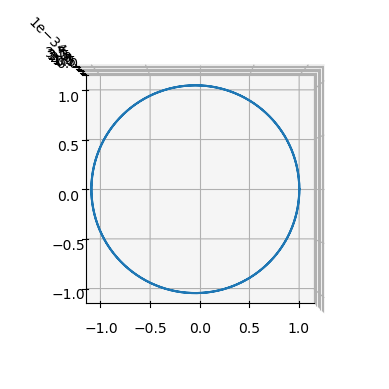

In [7]:
ax = pk.plot.make_3Daxis()
ax.plot(sol[:, 0], sol[:, 1], sol[:, 2])
ax.view_init(90, -90)

# Simulating some sail action

In [8]:
# Setting the sail orientation to maximally increase semimajor axis
ta.pars[:2] = [np.arctan(1 / np.sqrt(2)), np.pi / 2]
# Defining the initial spacecraft state (circular orbit)
ta.time = 0
ta.state[:] = [1.0, 0, 0, 0, 1.0, 0]
tgrid = np.linspace(0, 6 * np.pi, 10000)
# Propagating
sol_smap = ta.propagate_grid(tgrid)[-1]
# Setting the sail orientation to maximally decrease semimajor axis
ta.pars[:2] = [np.arctan(1 / np.sqrt(2)), -np.pi / 2]
ta.time = 0
ta.state[:] = [1.0, 0, 0, 0, 1.0, 0]
sol_smam = ta.propagate_grid(tgrid)[-1]
# Setting the sail orientation to maximally increase inclination
ta.pars[:2] = [np.arctan(1 / np.sqrt(2)), 0.0]
ta.time = 0
ta.state[:] = [1.0, 0, 0, 0, 1.0, 0]
sol_smai = ta.propagate_grid(tgrid)[-1]

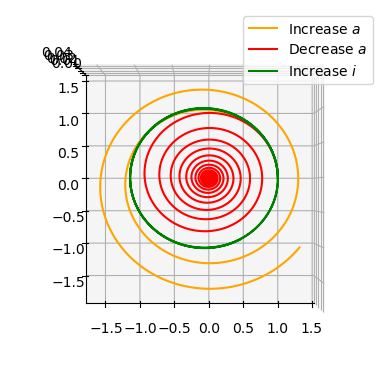

In [9]:
ax = pk.plot.make_3Daxis()
ax.plot(sol_smap[:, 0], sol_smap[:, 1], sol_smap[:, 2], "orange", label="Increase $a$")
ax.plot(sol_smam[:, 0], sol_smam[:, 1], sol_smam[:, 2], "red", label="Decrease $a$")
ax.plot(sol_smai[:, 0], sol_smai[:, 1], sol_smai[:, 2], "green", label="Increase $i$")

ax.view_init(90, -90)
ax.legend()